# Pandasの基本

Pandas (panel-data-sの略)は、Python向けのデータ分析ライブラリで、主にスプレッドシート状のデータを扱うことができる。Pandasでは以下に説明する`DataFrame`を使って、データの操作やファイル入出力、グラフの作成等を行うことができる。

## DataFrameの操作

Pandasの中核をなすデータ構造に`DataFrame`がある。DataFrameとは、スプレッドシート状のデータを扱うデータ構造で、Excelのように数値を縦横に配置したデータを作ることができる。

```{image} https://pandas.pydata.org/docs/_images/01_table_dataframe.svg
:align: center
:width: 80%
```

<div align="center">
    
(Pandasの[チュートリアル](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html)より引用)

</div>

例えば、テストの点数を集計したようなデータを考えてみる。以下、三人の学生について、数学と英語の点数を集計した物である (性別と点数の間には特別な意味はない)。

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(
    {
        "Name": ["Taro", "Jiro", "Hanako"],
        "Math": [100, 90, 85],
        "English": [85, 90, 100],
    }
)
print(df)

     Name  Math  English
0    Taro   100       85
1    Jiro    90       90
2  Hanako    85      100


上記の通り、`print`で`DataFrame`を出力すると、表のように整理された文字列が出力される。また、Jupyter環境であれば、単に`df`と書くか、IPythonモジュールの`display`を用いることでHTMLにより整形された表を出力することができる。

In [67]:
# 単にdfと書く
df

,Name,Math,English
0,Taro,100,85
1,Jiro,90,90
2,Hanako,85,100


In [68]:
# displayの使用
from IPython.display import display
display(df)

,Name,Math,English
0,Taro,100,85
1,Jiro,90,90
2,Hanako,85,100


なお、`DataFrame`においては、各行にデフォルトで数字のインデックスが振られるが、これ自体は必要なく、例えばNameの列で各行を代表させれ十分であることも多い。このような場合には、DataFrameに対して`index`を指定して初期化する。

In [69]:
df_label = pd.DataFrame(
    {
        "Math": [100, 90, 85],
        "English": [85, 90, 100],
    },
    index=["Taro", "Jiro", "Hanako"],
)

In [70]:
df_label

,Math,English
Taro,100,85
Jiro,90,90
Hanako,85,100


```{note}
`index`を指定しない場合は、`index`に当たる0, 1, 2, ...がラベルであると見なされる。特に行お操作を行うときに、ラベルがインデックスなのか、その他の文字列等なのかを意識しておくことが大事になる。
```

### 行と列の取り出し

Pandasでは行と列の意味合いが微妙に異なっており、それぞれを取り扱う場合に異なる操作が必要となる。

**列の取り出し**

`DataFrame`の各列は`Series`という型で表わされていて、dfに各列のラベルを与えることで取り出すことができる。

In [71]:
col = df["Math"]
print('type is "{:s}"'.format(type(col).__name__))

type is "Series"


In [72]:
col

0    100
1     90
2     85
Name: Math, dtype: int64

また、複数のラベルを指定して、以下のように複数列を一度に取り出すこともできる。

In [73]:
cols = df[["Math", "English"]]
cols

,Math,English
0,100,85
1,90,90
2,85,100


**行の取り出し**

一方で、行を取り出す場合には`loc`あるいは`iloc`を用いる。`loc`は各行にラベルがついている場合に使用し、`iloc`は単純に行のインデックスを指定して使用する。

In [74]:
df.iloc[0]

Name       Taro
Math        100
English      85
Name: 0, dtype: object

In [75]:
df_label.loc["Taro"]

Math       100
English     85
Name: Taro, dtype: int64

### 行と列の追加

**列の追加**

列を追加する方法はいくつかあるが、行と列でできるだけ似た操作を使うのなら`DataFrame`を辞書型のように扱って、データ列を代入する方法と`concat`を使う方法の2つがある。この2つなら辞書型として扱う方法の方が簡単で、行ラベルがインデックスなのか文字列等七日によって区別する必要がない。

In [76]:
# 辞書型として使う場合 (df自体が書き換わるので注意)
df_copy = df.copy()
df_copy["Physics"] = [75, 85, 80]
df_copy

,Name,Math,English,Physics
0,Taro,100,85,75
1,Jiro,90,90,85
2,Hanako,85,100,80


In [77]:
# concatを用いる方法 (行ラベルがインデックス)
new_col = pd.Series({0: 75, 1: 85, 2: 80}, name="Physics")
pd.concat([df, new_col], axis=1)

,Name,Math,English,Physics
0,Taro,100,85,75
1,Jiro,90,90,85
2,Hanako,85,100,80


`concat`を用いる場合、パラメータに`axis=1`を指定する (初期値は`axis=0` (行)に対応するので、明示的に`axis=1` (列)を指定する)。

In [90]:
# concatを用いる方法 (行ラベルが文字列)
new_col = pd.Series({"Taro": 75, "Jiro": 85, "Hanako": 80}, name="Physics")
pd.concat([df_label, new_col], axis=1)

,Math,English,Physics
Taro,100,85,75
Jiro,90,90,85
Hanako,85,100,80


**行の追加**

行を追加する場合も、上記の列の追加と同様に`df.loc`を辞書型と考えてデータ列を代入する方法 (こちらの方がシンプル)と、`concat`を用いてデータ行を結合する方法の2つがある。

行の場合は、行ラベルがインデックスなのか、文字列等なのかによって、書き方が異なる。特に、行を取り出す場合と異なり、`iloc`を用いるて行を追加することはできないので注意すること。

In [91]:
# locを用いる場合 (ラベルがインデックス)
df_copy = df.copy()
df_copy.loc[3] = ["Kikue", 100, 100]
df_copy

,Name,Math,English
0,Taro,100,85
1,Jiro,90,90
2,Hanako,85,100
3,Kikue,100,100


In [92]:
# locを用いる (ラベルが文字列他)
df_copy = df_label.copy()
df_copy.loc["Kikue"] = [100, 100]
df_copy

,Math,English
Taro,100,85
Jiro,90,90
Hanako,85,100
Kikue,100,100


`concat`を使って「行」を追加する場合には、一度、行を含む`DataFrame`を作成して、それを`concat`で結合する必要がある。一行分のデータであれば、

In [107]:
# concatを用いる (ラベルがインデックス)
new_row = pd.Series({"Name": "Kikue", "Math": 100, "English": 100}, name=3)
pd.concat([df, pd.DataFrame(new_row).T], axis=0)

,Name,Math,English
0,Taro,100,85
1,Jiro,90,90
2,Hanako,85,100
3,Kikue,100,100


In [106]:
# concatを用いる (ラベルが文字列)
new_row = pd.Series({"Math": 100, "English": 100}, name="Kikue")
pd.concat([df_label, pd.DataFrame(new_row).T], axis=0)

,Math,English
Taro,100,85
Jiro,90,90
Hanako,85,100
Kikue,100,100


### 行と列の削除

列の削除のには`drop`を用いる。このメソッドには`columns=...`に削除するラベルの配列を与える。`insert`とは異なり、`drop`は`DataFrame`自体を**更新しない**ので、もし`DataFrame`自体を更新したい場合には引数に`inplace=True`を与える。

In [93]:
df.drop(columns=["Math"])

,Name,English
0,Taro,85
1,Jiro,90
2,Hanako,100


In [94]:
df  # DataFrameは更新されていない

,Name,Math,English
0,Taro,100,85
1,Jiro,90,90
2,Hanako,85,100


In [96]:
df_copy = df.copy()
df_copy.drop(columns=["Math"], inplace=True)
df_copy  # DataFrameが更新される

,Name,English
0,Taro,85
1,Jiro,90
2,Hanako,100


### 行の取り出し

Pandasの`DataFrame`では、行を取り出すときには列を取り出すときと少し違った操作が必要になる。この際、行のインデックスを指定する`iloc`と、行のラベルを指定する`loc`の二つの方法がある。

In [16]:
# 行番号の指定
print(df.iloc[0, 0])

Taro


In [17]:
# 行ラベルの指定
df.loc[2]

Name       Hanako
Math           85
English       100
Name: 2, dtype: object

### 行の追加

In [18]:
new_row = pd.DataFrame({"Name": ["Kikue"], "Math": [100], "English": [100]})
pd.concat([df, new_row], ignore_index=True)

,Name,Math,English
0,Taro,100,85
1,Jiro,90,90
2,Hanako,85,100
3,Kikue,100,100


In [19]:
df.loc[len(df.index)] = ["Kikue", 100, 100]
df

,Name,Math,English
0,Taro,100,85
1,Jiro,90,90
2,Hanako,85,100
3,Kikue,100,100


## 数値計算

In [9]:
print("Math avg:", df["Math"].mean())
print("Math std:", df["Math"].std())

Math avg: 91.66666666666667
Math std: 7.637626158259734


これらを使うと、偏差値なども簡単に計算できる。

In [10]:
math_dev = 50.0 + (df["Math"] - df["Math"].mean()) / df["Math"].std() * 10.0
print(math_dev)

Taro      60.910895
Jiro      47.817821
Hanako    41.271284
Name: Math, dtype: float64


In [11]:
eng_dev = 50.0 + (df["Math"] - df["Math"].mean()) / df["Math"].std() * 10.0
print(eng_dev)

Taro      60.910895
Jiro      47.817821
Hanako    41.271284
Name: Math, dtype: float64


また、Pandasには`describe`という関数も用意されていて、これを用いると主要な統計指標を列ごとに計算して一覧表示をしてくれる。

In [12]:
df.describe()

,Math,English
count,3.000000,3.000000
mean,91.666667,91.666667
std,7.637626,7.637626
min,85.000000,85.000000
25%,87.500000,87.500000
50%,90.000000,90.000000
75%,95.000000,95.000000
max,100.000000,100.000000


## データの入出力

次に、先ほど作成した`DataFrame`をファイルに出力してみよう。出力できるファイル形式は様々だが、CSVとExcel形式のファイルをここでは試してみる。

CSVを出力する場合には`DataFrame`の`to_csv`を用いれば良く、第1引数に出力先のファイル名を指定する。加えて**日本語を出力する場合には`encoding="utf_8_sig"`あるいは`encoding="shift_jis"`を指定**しておく。

In [20]:
# 最初の列の表記を変更
df = df.rename(index={"Taro": "太郎", "Jiro": "次郎", "Hanako": "花子"})
df

,Name,Math,English
0,Taro,100,85
1,Jiro,90,90
2,Hanako,85,100
3,Kikue,100,100


In [21]:
# CSVに出力
df.to_csv("pandas.csv", encoding="utf_8_sig")

Excelファイルを出力する場合は、`to_excel`に対して、出力ファイル名を含むいくつかの引数を指定する。Excelの場合は、エンコーディングを指定する必要はない (指定できない)。なお、Excelファイルの操作を行う場合には、Pandas以外に`openpyxl`をインストールしておく必要がある。

In [22]:
# Excelファイルに出力
df.to_excel("pandas.xlsx")

正しく出力されると、Excel上で以下のように表の内容が確認できる。

```{image} ./imgs/pandas_to_excel.jpg
:align: center
:width: 90%
```

## グラフの作成

`DataFrame`は`plot`というメンバを持ち、さらに`plot`に対してグラフの種類に対応するメソッドを呼び出すことで簡単にグラフを作成することができる。以下は棒グラフと散布図を作る例である。また、同様の出力は`plot`をメソッドとして呼び出して`kind`パラメータにグラフの種類を指定することでも実現できる。

In [30]:
# 再度DataFrameを作成
df = pd.DataFrame(
    {
        "Name": ["Taro", "Jiro", "Hanako"],
        "Math": [100, 90, 85],
        "English": [85, 90, 100],
    }
)

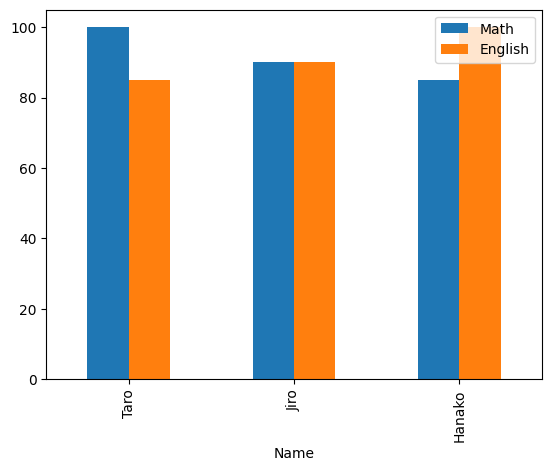

In [34]:
# 棒グラフの作成
df.plot.bar(x="Name", y=["Math", "English"])
plt.show()

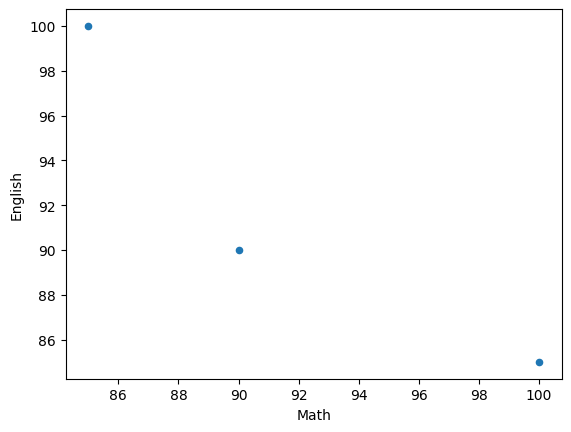

In [25]:
# 散布図の作成
df.plot.scatter(x="Math", y="English")
plt.show()

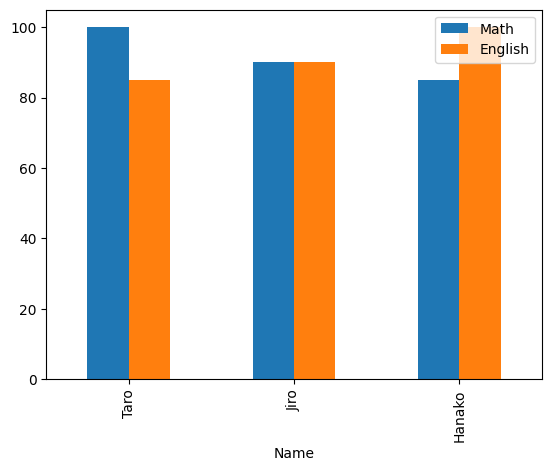

In [35]:
# plot(..., kind=...)を使う場合
df.plot(x="Name", y=["Math", "English"], kind="bar")
plt.show()

なお、グラフの見た目を調整したい場合には、`plt.title`等のメソッドを順次呼び出せば良い。

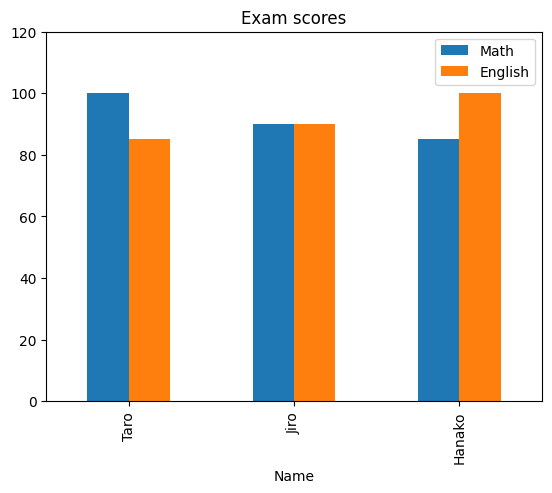

In [36]:
df.plot.bar(x="Name", y=["Math", "English"])
plt.title("Exam scores")
plt.ylim([0, 120])
plt.legend(loc="upper right")
plt.show()

また、複数のグラフを並べたい場合には`plot`の`ax`パラメータに対してMatplotlibの`SubplotAxis`を指定すれば良い。

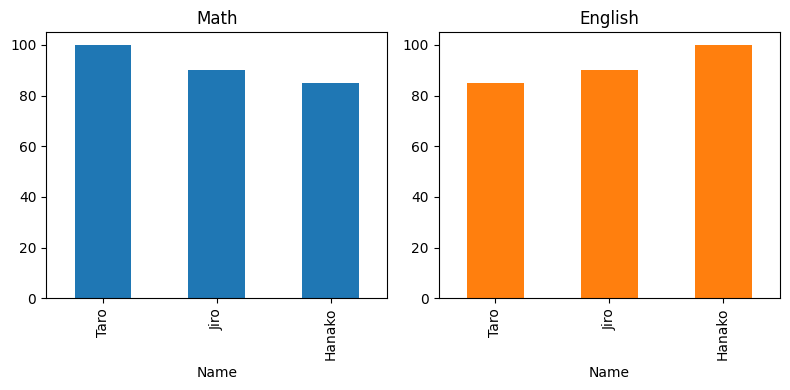

In [42]:
fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(121)
df.plot(ax=ax, x="Name", y="Math", kind="bar", legend=None, color="tab:blue")
ax.set_title("Math")

ax = fig.add_subplot(122)
df.plot(ax=ax, x="Name", y="English", kind="bar", legend=None, color="tab:orange")
ax.set_title("English")

plt.tight_layout()
plt.show()